In [ ]:
! 

In [1]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

In /home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:
 /home/liyuan3970/Typhoon_LMQ/data/ncl/Froud/demo.ncl




/bin/sh: 1: ncl: not found


# 计算Froud数

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross
import math

# Open the NetCDF file

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)

# Extract the model height and wind speed

low = 5
high = 19

z = getvar(ncfile, "z")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
eth =  getvar(ncfile, "eth",timeidx=85)#[0:,:,:]

ua =  getvar(ncfile, "ua",timeidx=85)#[0:,:,:]
va =  getvar(ncfile, "va",timeidx=85)#[0:,:,:]



# Create the start point and end point for the cross section
start_point = CoordPair(lat= 28.4, lon=120.9)
end_point = CoordPair(lat=29.5, lon=120.9)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.


eth_cross = vertcross(eth, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)[:,15]

z_cross = vertcross(z, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)[:,15]

u_cross = vertcross(ua, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)[:,15]

v_cross = vertcross(va, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)[:,15]


g = 9.8

ave_eth = (eth_cross[high] + eth_cross[low])/2

dif_eth = (eth_cross[high] - eth_cross[low])

dif_z = (z_cross[high] - z_cross[low]) 

dif_u =  (u_cross[high] - u_cross[low])*(u_cross[high] - u_cross[low])

dif_v = (v_cross[high] - v_cross[low])*(v_cross[high] - v_cross[low])


N = -(g/ave_eth)*(dif_eth/dif_z)

n = math.sqrt(N)

h = 1388

u_ave = (u_cross[high] + u_cross[low])/2

v_ave = (v_cross[high] + v_cross[low])/2

Fr = v_ave/(n*h)

#print(Fr)
print(v_ave)




<xarray.DataArray 'va_cross' ()>
array(-18.28051567)
Coordinates:
    XTIME    float32 850.0
    Time     datetime64[ns] 2019-08-09T20:10:00
    xy_loc   object CoordPair(x=84.0, y=61.0, lat=28.801036834716797, lon=120.909423828125)


# 计算Ri数

<xarray.DataArray ()>
array(-2.46638765)
Coordinates:
    xy_loc   object CoordPair(x=84.0, y=61.0, lat=28.801036834716797, lon=120.909423828125)
    XTIME    float32 850.0
    Time     datetime64[ns] 2019-08-09T20:10:00


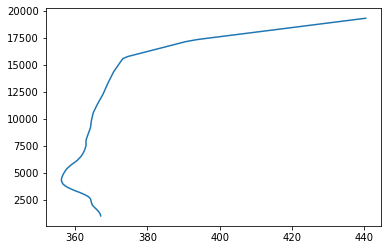

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)

# Extract the model height and wind speed

low = 5
high = 19

z = getvar(ncfile, "z")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
eth =  getvar(ncfile, "eth",timeidx=85)#[0:,:,:]

ua =  getvar(ncfile, "ua",timeidx=85)#[0:,:,:]
va =  getvar(ncfile, "va",timeidx=85)#[0:,:,:]



# Create the start point and end point for the cross section
start_point = CoordPair(lat= 28.4, lon=120.9)
end_point = CoordPair(lat=29.5, lon=120.9)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.


eth_cross = vertcross(eth, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)[:,15]

z_cross = vertcross(z, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)[:,15]

u_cross = vertcross(ua, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)[:,15]

v_cross = vertcross(va, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)[:,15]


g = 9.8

ave_eth = (eth_cross[high] + eth_cross[low])/2

dif_eth = (eth_cross[high] - eth_cross[low])

dif_z = (z_cross[high] - z_cross[low]) 

dif_u =  (u_cross[high] - u_cross[low])*(u_cross[high] - u_cross[low])

dif_v = (v_cross[high] - v_cross[low])*(v_cross[high] - v_cross[low])

Ri = (g/ave_eth)*dif_eth*dif_z/(dif_u + dif_v)
print(Ri)

#print(eth_cross[:,10])

# plt.plot(z_cross,eth_cross)

plt.plot(eth_cross,z_cross)
